In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [366]:
data = pd.read_csv('set.csv')


aa = data['x']
bb = data['y']

df = pd.DataFrame ({
    'x' : aa,
    'y' : bb
})

In [367]:
k = 3
centroids = {
    i+1 : [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

<function matplotlib.pyplot.show(*args, **kw)>

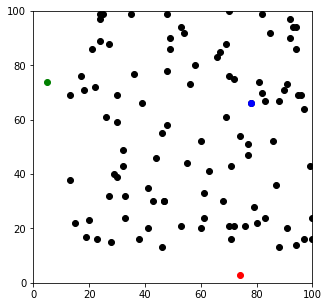

In [368]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = 'k')
colmap = {1: 'r' , 2: 'g' , 3: 'b'}
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show

x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  53  94        93.391648        52.000000        37.536649        3     b
1  95  69        69.260378        90.138782        17.262677        3     b
2  85  92        89.677199        82.000000        26.925824        3     b
3  39  66        72.069411        34.928498        39.000000        2     g
4  22  72        86.400231        17.117243        56.320511        2     g


<function matplotlib.pyplot.show(*args, **kw)>

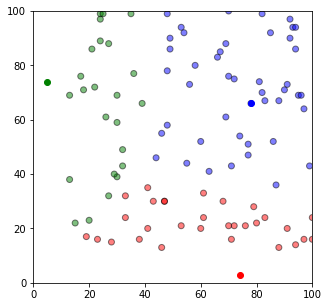

In [369]:
def assigment(df, centroids):
    for i in centroids.keys() :
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])

    return df

df = assigment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show

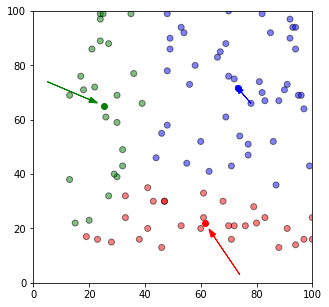

In [370]:
import copy

old_centroids = copy.deepcopy(centroids)
def update(k) :
    for i in centroids.keys() :
        centroids[i][0] = np.mean(df[df['closest'] == i ]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i ]['y'])
    
    return k

centroids = update(centroids)

fig = plt.figure(figsize = (5,5))

ax = plt.axes()
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)

for i in old_centroids.keys() :
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75

    ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc=colmap[i], ec = colmap[i])

plt.show()

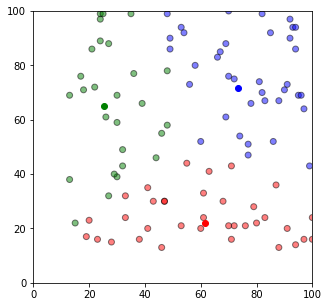

In [371]:
df = assigment(df,centroids)

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

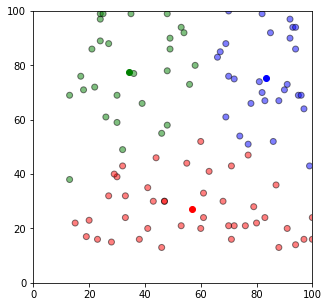

In [372]:
while True :
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assigment(df,centroids)

    if closest_centroids.equals(df['closest']) :
        break

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [373]:
df = pd.DataFrame ({
    'x' : aa,
    'y' : bb
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [374]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

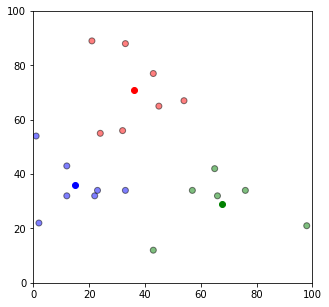

In [375]:
fig = plt.figure(figsize = (5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

plt.scatter(df['x'], df['y'], color = colors1, alpha = 0.5 , edgecolor='k')
for idx, centroid in enumerate(centroids) :
    plt.scatter(*centroid, color=colmap[idx+1])

plt.xlim(0,100)
plt.ylim(0,100)
plt.show()